---
title: "Lab 5 - Insurance Costs"
author: "Tyler Allen"
date: "2024-11-05"
format:
  html:
    cold-fold: true
    embed-resources: true
theme: "lux"
---

**Part One: Data Exploration**

The dataset we will study for this assignment contains information about health insurance costs for individuals with no dependents (children) in the United States. The information contained in the data is:


*   Age of primary beneficiary
*  Gender of primary beneficiary (only female, male recorded)


*   Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   Whether the beneficiary smokes

*   The beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.
*   Individual medical costs billed by health insurance


You can find this data at: https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1

Read in the dataset, and display some summaries of the data.

Fix any concerns you have about the data.

Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving insurance_costs_1.csv to insurance_costs_1.csv


In [6]:
import pandas as pd
df = pd.read_csv('insurance_costs_1.csv')
df.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [25]:
df_dummified = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df_dummified.head()

,age,bmi,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,False,True,False,False,True
1,33,22.705,21984.47061,True,False,True,False,False
2,32,28.880,3866.85520,True,False,True,False,False
3,31,25.740,3756.62160,False,False,False,True,False
4,60,25.840,28923.13692,False,False,True,False,False


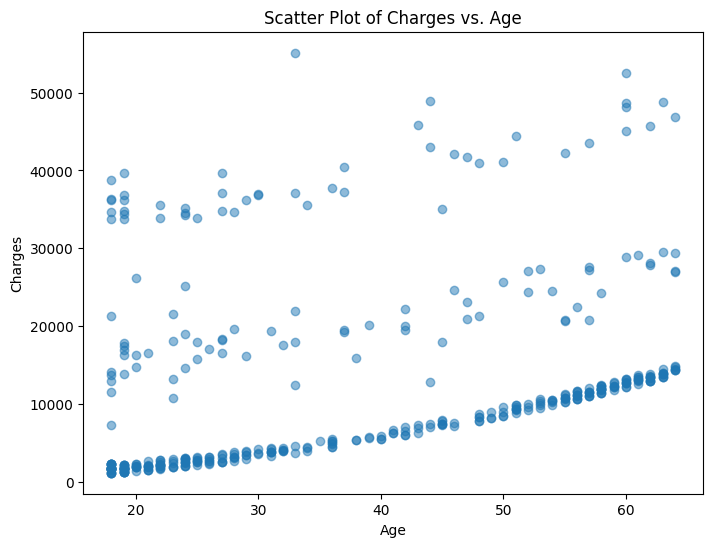

In [10]:
#Scatterplot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['charges'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Scatter Plot of Charges vs. Age')
plt.show()

This scatterplot of charges vs age show a slight positive correlation between charges and age, indicating that older people likely tend to get billed higher medical costs by health insurance companies.

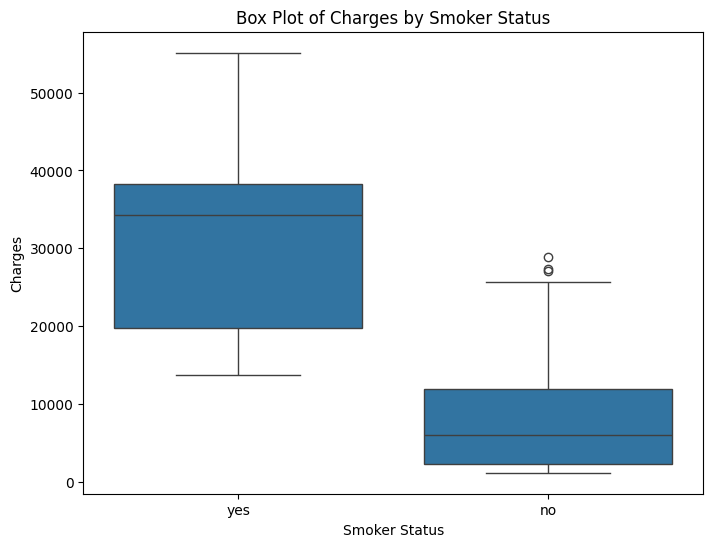

In [12]:
#Boxplot of charges by smoking status
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.title('Box Plot of Charges by Smoker Status')
plt.show()

The box plot of charges by smoker status shows that people who smoke tend to get billed more in medical costs, which makes sense considering smoking is bad for you.

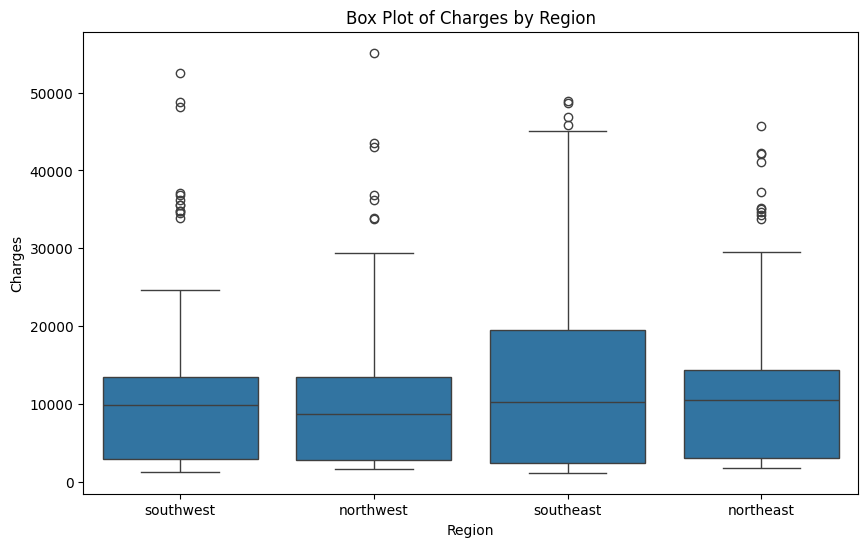

In [13]:
#Boxplot of charges by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Box Plot of Charges by Region')
plt.show()

The boxplot of charges by region shows that the southeast region typically gets charged more than the other regions, which could be some sort of indication of poor health in that region. It is impossible to not what the causation may be from this data alone.

**Part Two: Simple Linear Models**
1. Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['age']]
y = df['charges']

#creating and fitting the model
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print(model.intercept_)
print(model.coef_)

3611.758798507106
[228.79904937]


According to this model, when age is 0, the amount of charges would be 3611.76 dollars (the dollar sign is giving me trouble in the output). For each additonal year of age, the amount of charges increases by $228.79.

In [42]:
#FOR LATER USE (MSE AND R^2)
#model with only age
X_Q1 = df_dummified[['age_standardized']]
y = df_dummified['log_charges']

model_Q1 = LinearRegression()
model_Q1.fit(X_Q2, y)

y_pred_Q1 = model_Q1.predict(X_Q2)

mse_Q1 = mean_squared_error(y, y_pred_Q1)
r2_Q1 = r2_score(y, y_pred_Q1)

print(mse_Q1)
print(r2_Q1)

0.7398307866154088
0.3212982206988314


2. Make a model that also incorporates the variable sex. Report your results.

In [26]:
X = df_dummified[['age', 'sex_male']]
y = df_dummified['charges']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print(model.intercept_)
print(model.coef_[0])
print(model.coef_[1])

3315.3323465342655
228.4258623585593
649.8325899725361


According to this model, the y-intercept is $3315.33, the coefficient for age is 228.42 and the coefficient for males is 649.83.

3. Now make a model that does not include sex, but does include smoker. Report your results.

In [27]:
X = df_dummified[['age', 'smoker_yes']]
y = df_dummified['charges']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print(model.intercept_)
print(model.coef_[0])
print(model.coef_[1])

-2166.852295375431
253.14535548828445
24048.86743795388


According to this model, the y-intercept is -$2166.85, the coefficient for age is 253.14, and the coefficient for smokers is 24048.86.

4. Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

In [36]:
from sklearn.preprocessing import StandardScaler
import numpy as np

#Standardizing age
scaler = StandardScaler()
df_dummified['age_standardized'] = scaler.fit_transform(df_dummified[['age']])

#Log transformation to charges
df_dummified['log_charges'] = np.log(df_dummified['charges'])

In [37]:
#model with sex as dummy variable
X_Q2 = df_dummified[['age_standardized', 'sex_male']]
y = df_dummified['log_charges']

model_Q2 = LinearRegression()
model_Q2.fit(X_Q2, y)

y_pred_Q2 = model_Q2.predict(X_Q2)

mse_Q2 = mean_squared_error(y, y_pred_Q2)
r2_Q2 = r2_score(y, y_pred_Q2)

print(mse_Q2)
print(r2_Q2)

0.7398307866154088
0.3212982206988314


In [35]:
#model with smoker as dummy variable
X_Q3 = df_dummified[['age_standardized', 'smoker_yes']]

model_Q3 = LinearRegression()
model_Q3.fit(X_Q3, y)

y_pred_Q3 = model_Q3.predict(X_Q3)

mse_Q3 = mean_squared_error(y, y_pred_Q3)
r2_Q3 = r2_score(y, y_pred_Q3)

print(mse_Q3)
print(r2_Q3)

0.24451247117797223
0.7756905332244806


Since the model with smoker in it has a lower MSE and a higher R-squared value, it is the better model.

**Part Three: Multiple Linear Models**

Now let’s consider including multiple quantitative predictors.

1. Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

In [41]:
#Standardizing age
scaler = StandardScaler()
df_dummified['age_standardized'] = scaler.fit_transform(df_dummified[['age']])

#Standardizing bmi
scaler = StandardScaler()
df_dummified['bmi_standardized'] = scaler.fit_transform(df_dummified[['bmi']])


#Log transformation to charges
df_dummified['log_charges'] = np.log(df_dummified['charges'])

X = df_dummified[['age_standardized', 'bmi_standardized']]
y = df_dummified['log_charges']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(mse)
print(r2)

0.7337340602328076
0.32689120103790825


With a MSE of .733 and a R-squared value of .326, this model performed slightly better than the model in Part 2 Q1. The prior model had an MSE of .739 and an R-squared value of .321.

2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

In [45]:
df['age_squared'] = df['age'] ** 2

X = df[['age', 'age_squared']]
y = df_dummified['log_charges']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(mse)
print(r2)

0.7291389193532752
0.3311066653677259


This model has an MSE of .729 (which is lower than P2 Q1's of .739) and an R-squared value of .331 (which is higher than P2 Q1's of .321).

3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

In [49]:
from sklearn.preprocessing import PolynomialFeatures

X = df[['age', 'age_squared']]
y = df_dummified['log_charges']

#polynomial features up to degree 4
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

#use X_poly
y_pred = model.predict(X_poly)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(mse)
print(r2)

0.7222552860398388
0.3374215339328196


This model has an MSE of .722 which is lower than P2 Q1 and an R-square value of .337 which is higher than P2 Q1.

4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

In [50]:
X = df[['age', 'age_squared']]
y = df_dummified['log_charges']

#polynomial features up to degree 12
poly = PolynomialFeatures(degree=12, include_bias=False)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(mse)
print(r2)

0.774073869524956
0.2898844951281644


This model has a MSE of .774 which is higher than P2 Q1 and an R-square value of .289 which is lower than P2 Q1.

5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

According to the MSE and R-squared, the model that used only used age and smoker status as a variable was the best model with an MSE of .244 and an R-squared value of .775.

I'm not sure that I would agree that it is indeed the "best model" because it doesn't take in to account some other important factors, such as bmi and sex. It leads me to think that I might have messed up in my calculations, specifically with my scaling methods.

6. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


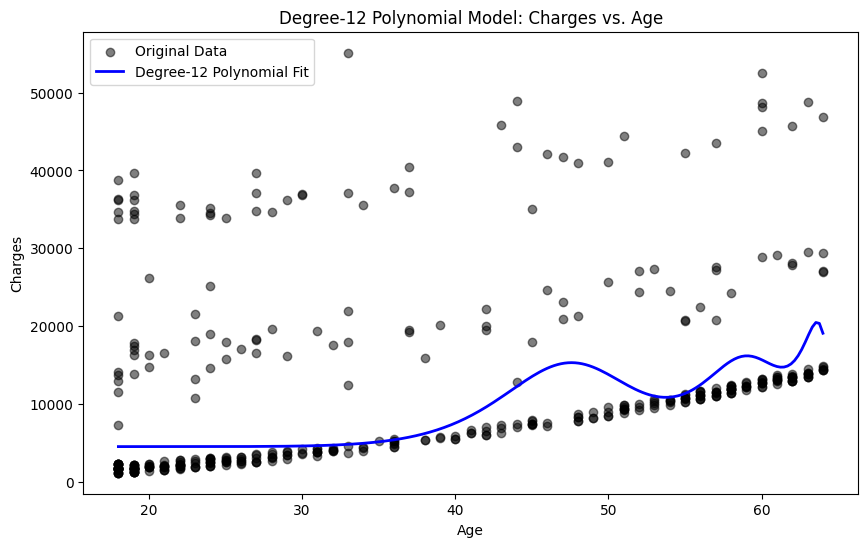

In [54]:
#started from the top to make sure i wasn't missing anything
df = pd.read_csv('insurance_costs_1.csv')
df['log_charges'] = np.log(df['charges']) #used ChatGPT here to transform charges back first

X = df[['age']]
X = df[['age']].copy()  # Create a copy to avoid the unwanted warning in the output
X['age_squared'] = X['age'] ** 2

y = df['log_charges']

poly = PolynomialFeatures(degree=12, include_bias=False)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred_log = model.predict(X_poly)

#also used ChatGPT here to transform predictions back to the original scale of charges
y_pred = np.exp(y_pred_log)

age_range = np.linspace(X['age'].min(), X['age'].max(), 200).reshape(-1, 1)
age_range_squared = age_range ** 2
age_range_poly = poly.transform(np.hstack((age_range, age_range_squared)))
charges_pred_smooth = np.exp(model.predict(age_range_poly))

#plot with original data and the new polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['charges'], color='black', alpha=0.5, label='Original Data')
plt.plot(age_range, charges_pred_smooth, color='blue', linewidth=2, label='Degree-12 Polynomial Fit')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Degree-12 Polynomial Model: Charges vs. Age')
plt.legend()
plt.show()

**Part Four: New data**

Great news! We’ve managed to collect data about the insurance costs for a few more individuals. You can find the new dataset here: https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1

Consider the following possible models:


*  Only age as a predictor.

*   age and bmi as a predictor.


*   age, bmi, and smoker as predictors (no interaction terms)
*   age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)


*   age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)


For each model, fit the model on the original data.

Then, use the fitted model to predict on the new data.

Report the MSE for each model’s new predictions. Based on this, which is the best model to use?

Make a plot showing the residuals of your final chosen model.

In [55]:
from google.colab import files
uploaded = files.upload()

Saving insurance_costs_2.csv to insurance_costs_2.csv


In [64]:
df = pd.read_csv('insurance_costs_1.csv')
df_dummified = pd.get_dummies(df, columns=['smoker'], drop_first=True)
df_dummified['log_charges'] = np.log(df_dummified['charges'])

In [60]:
newdf = pd.read_csv('insurance_costs_2.csv')
newdf.head()

,age,sex,bmi,smoker,region,charges
0,23,male,34.400,no,southwest,1826.84300
1,56,male,40.300,no,southwest,10602.38500
2,18,male,34.100,no,southeast,1137.01100
3,63,female,23.085,no,northeast,14451.83515
4,63,male,28.310,no,northwest,13770.09790


In [70]:
new_data_dummified = pd.get_dummies(newdf, columns=['smoker'], drop_first=True)
new_data_dummified['log_charges'] = np.log(new_data_dummified['charges'])

In [73]:
#Only age as predictor
X1 = df_dummified[['age']]
y = df_dummified['log_charges']

model1 = LinearRegression()
model1.fit(X1, y)

#Predict on new data
X1_new = new_data_dummified[['age']]
y_pred1 = model1.predict(X1_new)
mse1 = mean_squared_error(new_data_dummified['log_charges'], y_pred1)

print(mse1)

0.6793138692609526


In [75]:
# age and bmi as predictors
X2 = df_dummified[['age', 'bmi']]
model2 = LinearRegression()
model2.fit(X2, y)

X2_new = new_data_dummified[['age', 'bmi']]
y_pred2 = model2.predict(X2_new)
mse2 = mean_squared_error(new_data_dummified['log_charges'], y_pred2)

print(mse2)

0.6828073699860718


In [76]:
#age, bmi, and smoker as predictors
X3 = df_dummified[['age', 'bmi', 'smoker_yes']]
model3 = LinearRegression()
model3.fit(X3, y)

X3_new = new_data_dummified[['age', 'bmi', 'smoker_yes']]
y_pred3 = model3.predict(X3_new)
mse3 = mean_squared_error(new_data_dummified['log_charges'], y_pred3)

print(mse3)

0.1887707647174173


In [78]:
# age, and bmi with both having an interaction term with smoker
df_dummified['age_smoker'] = df_dummified['age'] * df_dummified['smoker_yes']
df_dummified['bmi_smoker'] = df_dummified['bmi'] * df_dummified['smoker_yes']
X4 = df_dummified[['age', 'bmi', 'age_smoker', 'bmi_smoker']]

model4 = LinearRegression()
model4.fit(X4, y)

new_data_dummified['age_smoker'] = new_data_dummified['age'] * new_data_dummified['smoker_yes']
new_data_dummified['bmi_smoker'] = new_data_dummified['bmi'] * new_data_dummified['smoker_yes']
X4_new = new_data_dummified[['age', 'bmi', 'age_smoker', 'bmi_smoker']]
y_pred4 = model4.predict(X4_new)
mse4 = mean_squared_error(new_data_dummified['log_charges'], y_pred4)

print(mse4)

0.13050842127861562


In [80]:
#age, bmi, and smoker, with age and bmi having interaction terms with smoker
X5 = df_dummified[['age', 'bmi', 'smoker_yes', 'age_smoker', 'bmi_smoker']]
model5 = LinearRegression()
model5.fit(X5, y)

X5_new = new_data_dummified[['age', 'bmi', 'smoker_yes', 'age_smoker', 'bmi_smoker']]
y_pred5 = model5.predict(X5_new)
mse5 = mean_squared_error(new_data_dummified['log_charges'], y_pred5)

print(mse5)

0.11596415391062902


Based on the MSE values for these 5 models, the last model that has age, bmi, and smoker as predictors, with both quantitative variables having an interaction term with smoker is the best because it has the lowest MSE value of 0.1159.

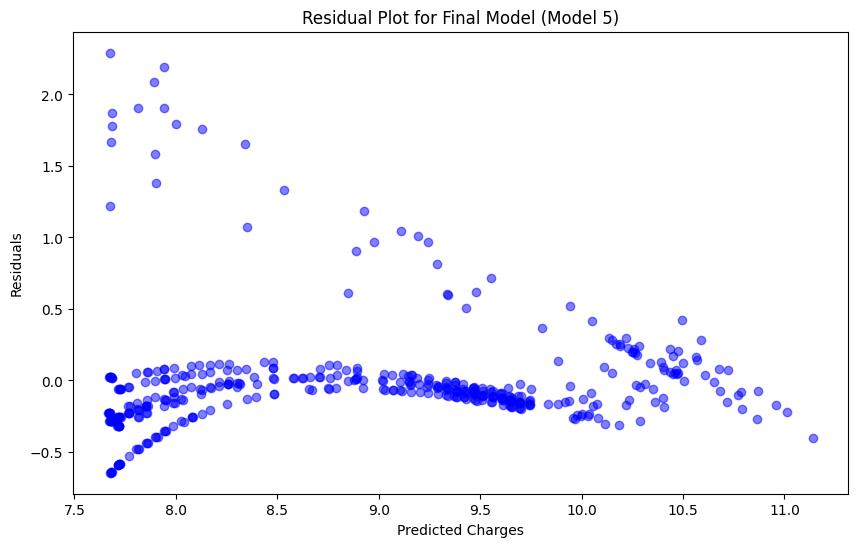

In [84]:
#plot showing the residuals of model 5
y_pred = model5.predict(X5)

residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot for Final Model (Model 5)')
plt.show()

**Part Five: Full Exploration**

Using any variables in this dataset, and any polynomial of those variables, find the model that best predicts on the new data after being fit on the original data.

Make a plot showing the residuals of your final chosen model.

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

df = pd.read_csv('insurance_costs_1.csv')

df_dummified = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Assuming df_dummified has the original data and log-transformed 'charges'
df_dummified['log_charges'] = np.log(df_dummified['charges'])
y = df_dummified['log_charges']  # Ensure y is based on df_dummified


new_data_dummified = pd.get_dummies(newdf, columns=['sex', 'smoker', 'region'], drop_first=True)
new_data_dummified['log_charges'] = np.log(new_data_dummified['charges'])
y_new = new_data_dummified['log_charges']  # Ensure y_new is based on new_data_dummified

In [95]:
model_results = {}

#variables for each model
feature_sets = {
    "Model 1": ['age', 'bmi'],
    "Model 2": ['age', 'bmi', 'smoker_yes'],
    "Model 3": ['age', 'bmi'],
    "Model 4": ['age', 'bmi', 'smoker_yes'],
    "Model 5": ['age', 'bmi', 'smoker_yes', 'sex_male', 'region_northwest', 'region_southeast', 'region_southwest']
}

#polynomial degrees for each model
poly_degrees = {
    "Model 1": 1,
    "Model 2": 1,
    "Model 3": 2,
    "Model 4": 2,
    "Model 5": 3
}

for model_name, features in feature_sets.items():
    #polynomial features for the model
    poly_degree = poly_degrees[model_name]
    poly = PolynomialFeatures(degree=poly_degree, include_bias=False)

    #pipeline with scaling, polynomial features, and linear regression
    pipeline = Pipeline([
        ('poly_features', poly),
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ])

    #feature matrix for the original data and new data
    X = df_dummified[features]
    X_new = new_data_dummified[features]

    pipeline.fit(X, y)

    y_pred_new = pipeline.predict(X_new)

    #used ChatGPT for convenience purposes here
    mse_new = mean_squared_error(new_data_dummified['log_charges'], y_pred_new)
    model_results[model_name] = mse_new
    print(f"{model_name} MSE on new data: {mse_new}")

Model 1 MSE on new data: 0.6828073699860719
Model 2 MSE on new data: 0.18877076471741736
Model 3 MSE on new data: 0.6921705464102592
Model 4 MSE on new data: 0.1078335660235083
Model 5 MSE on new data: 0.1227120690129744


Model 4 with the variables age, bmi, and smoker status, based on MSE, predicted best on the new data with a MSE of 0.1078. Below is a residual plot of Model 4.

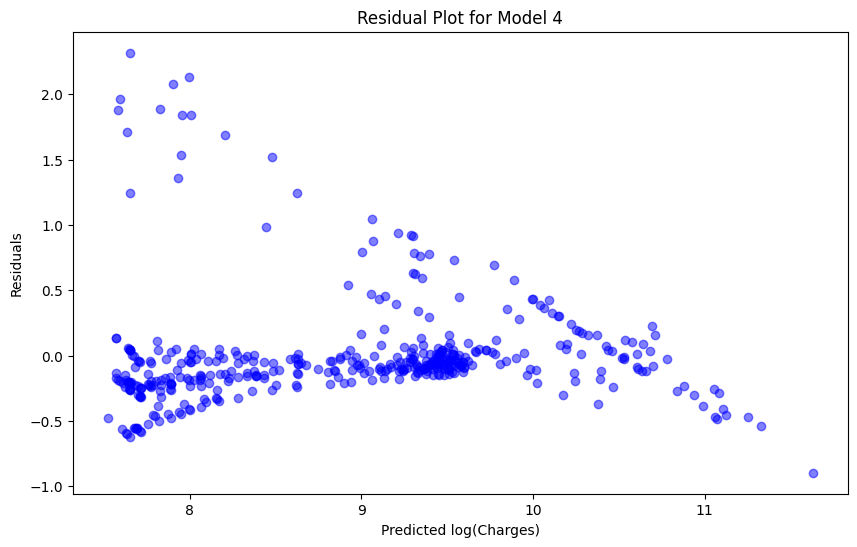

In [98]:
#start from the top so less errors
df = pd.read_csv('insurance_costs_1.csv')
df_dummified = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

df_dummified['log_charges'] = np.log(df_dummified['charges'])
y = df_dummified['log_charges']

#create polynomial terms for age and bmi
X_base = df_dummified[['age', 'bmi']]
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_base)

# Create df of the polynomial features with appropriate names
poly_feature_names = poly.get_feature_names_out(['age', 'bmi'])
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

#interaction terms with smoker
X_poly_df['age_smoker'] = df_dummified['age'] * df_dummified['smoker_yes']
X_poly_df['bmi_smoker'] = df_dummified['bmi'] * df_dummified['smoker_yes']

X4 = X_poly_df

model4 = LinearRegression()
model4.fit(X4, y)

y_pred = model4.predict(X4)

residuals = y - y_pred

# residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.xlabel('Predicted log(Charges)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Model 4')
plt.show()